In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data=pd.read_csv("D://data_sets//data2.txt",names=['size','bedrooms','price'])

In [5]:
data.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [6]:
data.tail()

,size,bedrooms,price
42,2567,4,314000
43,1200,3,299000
44,852,2,179900
45,1852,4,299900
46,1203,3,239500


In [7]:
data.shape

(47, 3)

In [9]:
data2=(data-data.mean())/data.std()

In [10]:
data2.insert(0,"ones",1)

In [11]:
X=data2.iloc[:,0:3]

In [12]:
y=data2.iloc[:,3:4]

In [13]:
theta=np.zeros((1,3))

In [14]:
X=np.matrix(X)
y=np.matrix(y)
theta=np.matrix(theta)

In [15]:
theta

matrix([[0., 0., 0.]])

In [18]:
def Computecost(X,y,theta):# cost fn formula
    inner=np.power(((X*theta.T)-y),2)
    return np.sum(inner)/(2*len(X))

In [19]:
Computecost(X,y,theta)

0.48936170212765967

In [39]:
def gradientDescent (X,y,theta,alpha,iters):
    temp=np.matrix(np.zeros(theta.shape))
    parameters=3
    cost=np.zeros(iters)
    for i in range(iters):
        error=(X*theta.T)-y
        for j in range (parameters):
            term=np.multiply(error,X[:,j])
            temp[0,j]=theta[0,j]-((alpha/len(X))* np.sum(term))
        
        
        theta=temp
        cost[i]=computeCost(X,y,theta)
    return theta,cost

In [40]:
final_theta,cost=gradientDescent(X,y,theta,0.01,10000)

In [42]:
final_theta

matrix([[-1.11264426e-16,  8.84765988e-01, -5.31788197e-02]])

In [43]:
cost

array([0.4805491 , 0.47198588, 0.46366462, ..., 0.13068648, 0.13068648,
       0.13068648])

In [55]:
y_pred=X*(final_theta.T)

In [56]:
y_pred

matrix([[ 0.12692309],
        [-0.43419524],
        [ 0.45646878],
        [-0.56916611],
        [ 1.05458494],
        [-0.07544503],
        [-0.50767502],
        [-0.62680133],
        [-0.67912784],
        [-0.55220822],
        [-0.12554488],
        [ 0.01113677],
        [-0.11132953],
        [ 2.63020487],
        [-0.8038208 ],
        [ 0.27525393],
        [-0.6760458 ],
        [-0.83944737],
        [ 0.61927291],
        [ 1.08909818],
        [-0.24826912],
        [-0.04367434],
        [-0.42974192],
        [-0.10105162],
        [ 2.11533051],
        [-0.99086025],
        [-0.5922881 ],
        [ 0.59674836],
        [ 0.23380277],
        [ 0.72032799],
        [-0.09822752],
        [-0.96242956],
        [-0.01421188],
        [ 1.276993  ],
        [-0.26916445],
        [-0.61566803],
        [-0.83610738],
        [ 0.08821449],
        [ 2.40728092],
        [ 0.12161439],
        [-0.29306027],
        [ 0.27610932],
        [ 0.57251305],
        [-0

In [57]:
def accuracy (y,y_pred):
    count=0
    i=0
    if y[i]==y_pred[i]:
        count+=1
        i+=1
    return (count*100/len(y))
    
        
        

In [58]:
accuracy(y,y_pred)

0.0

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [68]:
lr=LinearRegression()


In [69]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
lr.score(X_train,y_train),lr.score(X_test,y_test)

(0.7732868355996787, 0.54673889369052)

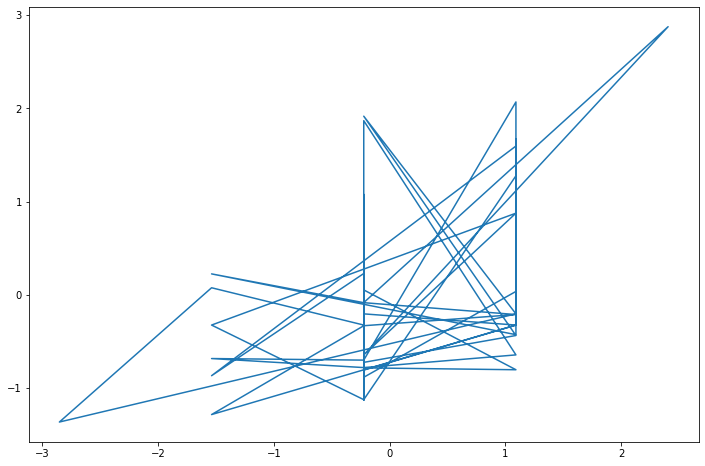

In [76]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(data2.bedrooms,data2.price)


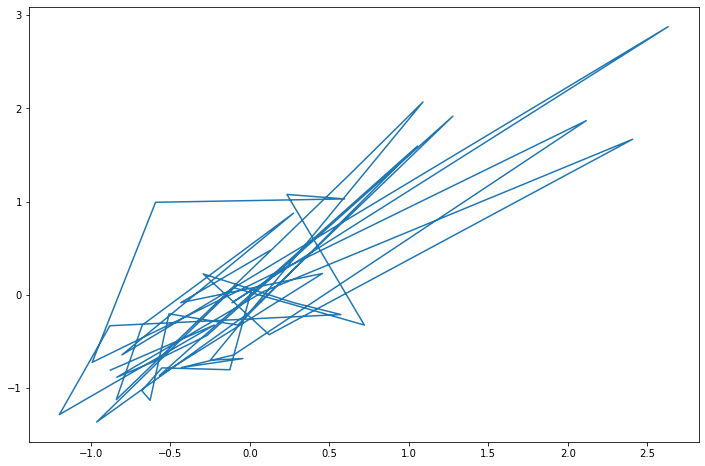

In [77]:
fig,ax2=plt.subplots(figsize=(12,8))
ax2.plot(np.array(y_pred),data2.price)